In [1]:
from keras.datasets import mnist
import keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/Users/Selina/anaconda/envs/python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


11493376/11490434 [==============================] - 1s 0us/step


## 1. Preprocess

In [13]:
import numpy as np
import matplotlib

In [14]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/6, stratify=y_train, random_state=0)
print(X_train.shape, 'train samples')
print(X_val.shape, 'test samples')

(50000, 784) train samples
(10000, 784) test samples


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.grid_search import GridSearchCV

/Users/Selina/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Selina/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Vinalla

In [49]:
#### Best Vinalla ###
model = Sequential([
            Dense(32,input_shape=(784,)),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(10),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=60, verbose=1, validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 4s 72us/step - loss: 0.5308 - acc: 0.8517 - val_loss: 0.2722 - val_acc: 0.9235
Epoch 2/60
50000/50000 [==============================] - 2s 35us/step - loss: 0.2393 - acc: 0.9310 - val_loss: 0.2158 - val_acc: 0.9410
Epoch 3/60
50000/50000 [==============================] - 2s 36us/step - loss: 0.1939 - acc: 0.9444 - val_loss: 0.1887 - val_acc: 0.9463
Epoch 4/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1670 - acc: 0.9508 - val_loss: 0.1766 - val_acc: 0.9518
Epoch 5/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1487 - acc: 0.9569 - val_loss: 0.1632 - val_acc: 0.9527
Epoch 6/60
50000/50000 [==============================] - 2s 41us/step - loss: 0.1350 - acc: 0.9597 - val_loss: 0.1523 - val_acc: 0.9560
Epoch 7/60
50000/50000 [==============================] - 2s 39us/step - loss: 0.1228 - acc: 0.9637 - val_loss: 0.1466 - val_acc

50000/50000 [==============================] - 2s 36us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.1904 - val_acc: 0.9670


In [55]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.19038974158683997
accuracy function on validation set: 0.967


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_115 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_116 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                330       
_________________________________________________________________
activation_117 (Activation)  (None, 10)                0         
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Text(0,0.5,'loss')

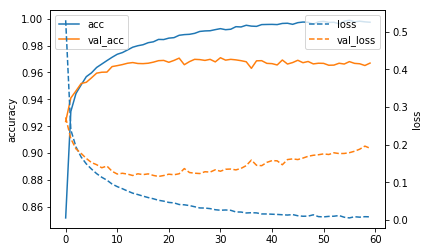

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In the learning plot of vinalla model, notice that though train loss function is decreasing all the time, we have validation loss increasing after 20 epoch. Although our val_accuracy almost stays the same, the loss function of validation indicates an evidence of overfit.

## Drop Out

In [65]:
from keras.layers import Dropout
model = Sequential([
            Dense(32,input_shape=(784,)),
            Activation('relu'),
            Dropout(0.5),
            Dense(32),
            Activation('relu'),
            Dense(10),
            Dropout(0.5),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_data=(X_val,y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.5918 - acc: 0.4206 - val_loss: 0.5316 - val_acc: 0.9010
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 1.2991 - acc: 0.5037 - val_loss: 0.3757 - val_acc: 0.9209
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.2345 - acc: 0.5208 - val_loss: 0.3157 - val_acc: 0.9289
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.2157 - acc: 0.5256 - val_loss: 0.3089 - val_acc: 0.9301
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.1958 - acc: 0.5255 - val_loss: 0.2765 - val_acc: 0.9354
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 1.1803 - acc: 0.5300 - val_loss: 0.2901 - val_acc: 0.9353
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 1.1813 - acc: 0.5293 - val_loss: 0.2539 - val_acc

In [66]:
score = model.evaluate(X_val, y_val, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.24644227361679077
accuracy function on validation set: 0.9434


In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_126 (Activation)  (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_127 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 10)                330       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
__________

Text(0,0.5,'loss')

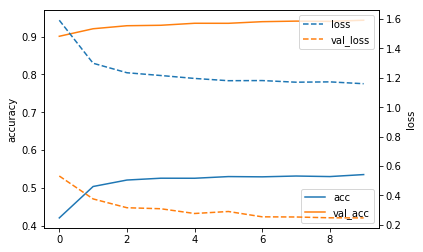

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

From the learning curve, we know that validation accuracy have the increasing trend alone with train accuracy, unlike the learning curve in vinalla model which is prone to overfitting.

Since validation score for vinalla (0.967) is greater than score of drop out (0.9465),
we choose train the vinalla model on entire train dataset to evaluate the final test score.

In [69]:
##[??] select the better model run on entire train dataset for evaluation
# reload the data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential([
            Dense(32,input_shape=(784,)),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(10),
            Activation('softmax')])
model.compile(optimizer = 'adam', loss="categorical_crossentropy",metrics = ['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=60, verbose=1, validation_split=.1)


60000 train samples
10000 test samples
Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 4s 80us/step - loss: 0.5216 - acc: 0.8532 - val_loss: 0.1939 - val_acc: 0.9445
Epoch 2/60
54000/54000 [==============================] - 2s 46us/step - loss: 0.2154 - acc: 0.9381 - val_loss: 0.1520 - val_acc: 0.9557
Epoch 3/60
54000/54000 [==============================] - 2s 46us/step - loss: 0.1719 - acc: 0.9504 - val_loss: 0.1382 - val_acc: 0.9610
Epoch 4/60
54000/54000 [==============================] - 2s 38us/step - loss: 0.1456 - acc: 0.9572 - val_loss: 0.1259 - val_acc: 0.9625
Epoch 5/60
54000/54000 [==============================] - 2s 38us/step - loss: 0.1281 - acc: 0.9630 - val_loss: 0.1161 - val_acc: 0.9655
Epoch 6/60
54000/54000 [==============================] - 2s 39us/step - loss: 0.1142 - acc: 0.9665 - val_loss: 0.1163 - val_acc: 0.9668
Epoch 7/60
54000/54000 [==============================] - 2s 39us/step - loss: 0.1043 - ac

Epoch 60/60
54000/54000 [==============================] - 2s 37us/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.1722 - val_acc: 0.9693


In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print("loss function on validation set: {}".format(score[0]))
print("accuracy function on validation set: {}".format(score[1]))

loss function on validation set: 0.18338083045011436
accuracy function on validation set: 0.9675


Text(0,0.5,'loss')

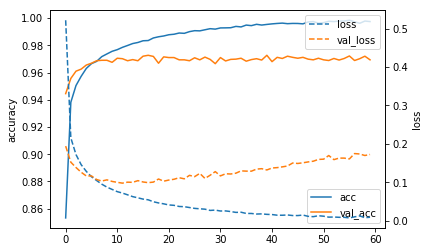

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

accuracy function on validation set is 0.9675, similar with validation dataset heldout. The plot shows the overall trend of accuracy increasing with loss function decreasing. 